In [2]:
import numpy as np
np.random.seed(1000)

import cv2
# specifying paths
import os

# image resize, convert img to numpy and vice versaa
from PIL import Image

# from tensorflow.keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense, Input
# os.environment['KERAS_BACKEND'] = 'tensorflow'

from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
TRAIN_DIRECTORY = "cell_images_segregated/train"
VALID_DIRECTORY = "cell_images_segregated/val"
TEST_DIRECTORY = "cell_images_segregated/test"

SHAPE = (128, 128, 3)
BATCH_SIZE = 64
EPOCHS = 25 

In [3]:
train_datagen = ImageDataGenerator(1./255,
                                  rotation_range=45,
                                  fill_mode='nearest',
                                  zoom_range=0.2)

valid_datagen = ImageDataGenerator(1./255)

In [8]:
train_data = train_datagen.flow_from_directory(TRAIN_DIRECTORY,
                                              target_size=SHAPE[:2],
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary')

valid_data = valid_datagen.flow_from_directory(VALID_DIRECTORY,
                                              target_size=SHAPE[:2],
                                              batch_size=BATCH_SIZE,
                                              class_mode='binary')

Found 19290 images belonging to 2 classes.
Found 5512 images belonging to 2 classes.


In [54]:
inp = Input(shape=SHAPE)

conv1 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(inp)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
norm1 = BatchNormalization(axis=-1)(pool1)
drop1 = Dropout(rate=0.3)(norm1)

conv2 = Conv2D(32, kernel_size=(3,3), activation='relu', padding='same')(drop1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv1)
norm2 = BatchNormalization(axis=-1)(pool1)
drop2 = Dropout(rate=0.3)(norm2)

# Flatten the matrix to get it ready for Dense Layers
flat = Flatten()(drop2)

hidden1 = Dense(128, activation='relu')(flat)
norm3 = BatchNormalization(axis=-1)(hidden1)
drop3 =Dropout(rate=0.2)(norm3)

hidden2 = Dense(64, activation='relu')(flat)
norm4 = BatchNormalization(axis=-1)(hidden2)
drop4 =Dropout(rate=0.2)(norm4)

out = Dense(1, activation='sigmoid')(drop4)

In [55]:
model = Model(inputs=inp, outputs=out)

In [56]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [57]:
print(model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_17 (Bat  (None, 64, 64, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_17 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 131072)            0   

In [58]:
history = model.fit(
        train_data,
        validation_data=valid_data,
        epochs=EPOCHS,
        steps_per_epoch=20,
        )

Epoch 1/25


2023-02-05 17:34:47.697452: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 0.7801 - accuracy: 0.5969

2023-02-05 17:34:53.374512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 13s 602ms/step - loss: 0.7801 - accuracy: 0.5969 - val_loss: 7.9946 - val_accuracy: 0.5122
Epoch 2/25
20/20 [==============================] - 11s 583ms/step - loss: 0.6706 - accuracy: 0.6547 - val_loss: 4.5772 - val_accuracy: 0.5067
Epoch 3/25
20/20 [==============================] - 12s 593ms/step - loss: 0.6652 - accuracy: 0.6336 - val_loss: 2.3503 - val_accuracy: 0.5259
Epoch 4/25
20/20 [==============================] - 12s 604ms/step - loss: 0.6413 - accuracy: 0.6469 - val_loss: 2.8159 - val_accuracy: 0.5227
Epoch 5/25
20/20 [==============================] - 12s 593ms/step - loss: 0.6087 - accuracy: 0.6711 - val_loss: 1.3483 - val_accuracy: 0.5691
Epoch 6/25
20/20 [==============================] - 12s 599ms/step - loss: 0.5925 - accuracy: 0.6781 - val_loss: 0.7906 - val_accuracy: 0.6691
Epoch 7/25
20/20 [==============================] - 12s 618ms/step - loss: 0.5759 - accuracy: 0.7266 - val_loss: 0.8617 - val_accuracy: 0.6016
Epoch 8/25

In [59]:
print("Training Data Indices: ", train_data.class_indices)
print("Validation Data Indices: ", valid_data.class_indices)

Training Data Indices:  {'Parasitized': 0, 'Uninfected': 1}
Validation Data Indices:  {'Parasitized': 0, 'Uninfected': 1}


In [60]:
print(inp)

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_5'), name='input_5', description="created by layer 'input_5'")


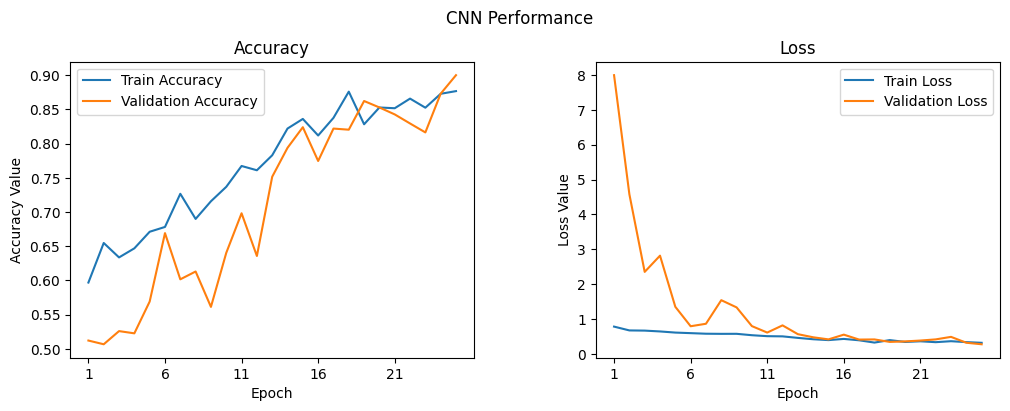

In [61]:
import matplotlib.pyplot as plt

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")